In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential # 순차적인 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

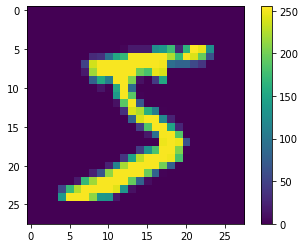

In [5]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

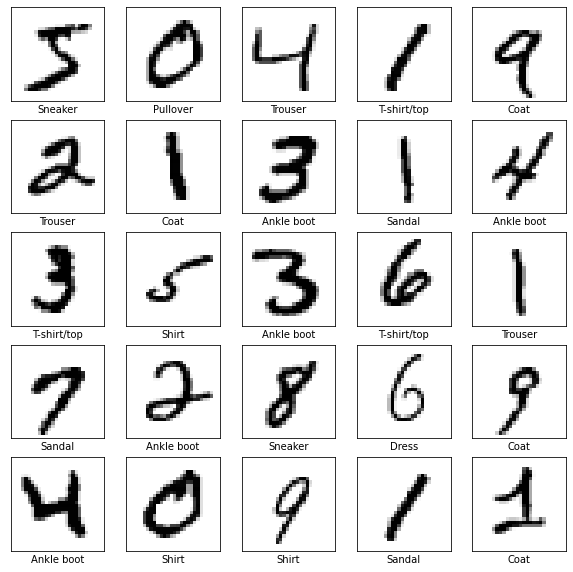

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_test[i]])
plt.show()

In [8]:
X_train = X_train.reshape(-1, 784).astype('float32') / 255 
X_test = X_test.reshape(-1, 784).astype('float32') / 255 
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [9]:
model = Sequential([
    Dense(512, input_dim =784, activation='relu'),
    Dense(300, activation='relu'),
    Dense(119, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               153900    
_________________________________________________________________
dense_2 (Dense)              (None, 119)               35819     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1200      
Total params: 592,839
Trainable params: 592,839
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# MODEL_DIR = './model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)

In [16]:
# modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
# checkpointer = ModelCheckpoint(filepath=modelpath, 
#                                verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(patience=20)

In [18]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100,
                    batch_size=500, verbose=2, 
                    callbacks=[early_stopping_callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 - 1s - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.1197 - val_accuracy: 0.9778
Epoch 2/100
48000/48000 - 1s - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.1128 - val_accuracy: 0.9781
Epoch 3/100
48000/48000 - 1s - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.1099 - val_accuracy: 0.9797
Epoch 4/100
48000/48000 - 1s - loss: 4.8104e-04 - accuracy: 0.9999 - val_loss: 0.1051 - val_accuracy: 0.9816
Epoch 5/100
48000/48000 - 1s - loss: 1.1997e-04 - accuracy: 1.0000 - val_loss: 0.1053 - val_accuracy: 0.9821
Epoch 6/100
48000/48000 - 1s - loss: 5.0680e-05 - accuracy: 1.0000 - val_loss: 0.1065 - val_accuracy: 0.9822
Epoch 7/100
48000/48000 - 1s - loss: 3.9169e-05 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9823
Epoch 8/100
48000/48000 - 1s - loss: 3.3087e-05 - accuracy: 1.0000 - val_loss: 0.1075 - val_accuracy: 0.9823
Epoch 9/100
48000/48000 - 1s - loss: 2.8779e-05 - accuracy: 1.0000 - val_loss: 0.1083 - va